<a href="https://colab.research.google.com/github/Varunaqua2004/1st-Repository/blob/main/Upper_Confidence_Bound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upper Confidence Bound (UCB)

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

In [3]:
print(dataset)

      Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0        1     0     0     0     1     0     0     0     1      0
1        0     0     0     0     0     0     0     0     1      0
2        0     0     0     0     0     0     0     0     0      0
3        0     1     0     0     0     0     0     1     0      0
4        0     0     0     0     0     0     0     0     0      0
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
9995     0     0     1     0     0     0     0     1     0      0
9996     0     0     0     0     0     0     0     0     0      0
9997     0     0     0     0     0     0     0     0     0      0
9998     1     0     0     0     0     0     0     1     0      0
9999     0     1     0     0     0     0     0     0     0      0

[10000 rows x 10 columns]


## Implementing UCB

In [4]:
# Running the UCB Algorithm
import math
N = 2000 # total no. of users
d = 10 # no of ads
ads_selected = []
numbers_of_selections = [0] * d # no. of ads selected
sums_of_rewards = [0] * d # rewards upto n
total_reward = 0
for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if (numbers_of_selections[i] > 0):
      # Step-2: -
      average_reward = (sums_of_rewards[i]/numbers_of_selections[i])
      delta_i = math.sqrt((3/2*math.log(n + 1))/numbers_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  numbers_of_selections[ad] += 1
  reward = dataset.values[n, ad] # reward
  sums_of_rewards[ad] += reward
  total_reward += reward

## Visualising the results

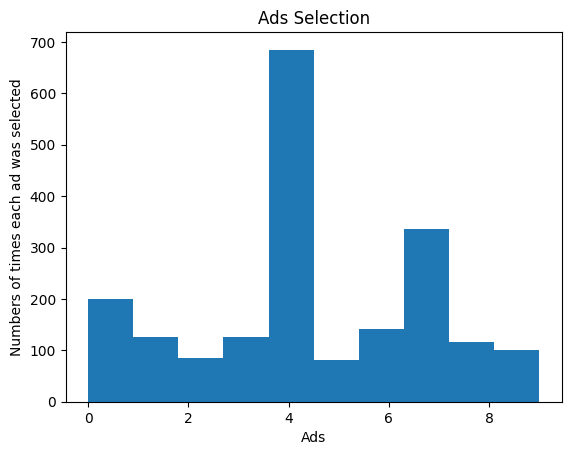

In [5]:
# Plotting a Histogram to find the most optimal ad.
plt.hist(ads_selected)
plt.title('Ads Selection')
plt.xlabel('Ads')
plt.ylabel('Numbers of times each ad was selected')
plt.show()